In [1]:
# See the dataset folder in linux-lab:
! ls $HOME/Dropbox/gits/data/ThOpt/master/


master_01_31_2017_11_44 master_06_29_2016_15_00 readme.txt
master_06_10_2016_18_27 master_09_13_2016_11_51
master_06_29_2016_14_52 master_09_13_2016_13_37


In [2]:
# Control variables: 


# master dataset location:
master_location = 'Dropbox/gits/data/ThOpt/master/'

# master file name : 
master_file_name = 'master_09_13_2016_13_37'


In [3]:
# import pandas library:
import os
import pandas as pds
import pylab as pyl
import numpy as np
from scipy.interpolate import *
%matplotlib inline

/Users/mds/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/mds/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
# pretty dataframe :
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
# required values :

# OS file seperator: 
file_seperator = os.sep


# User OS home directory:
user_home = os.environ['HOME']
user_home = user_home+file_seperator
user_home

'/Users/mds/'

In [6]:
# read the master file : 
full_master_file_path = user_home + master_location + master_file_name
data = pds.read_csv(full_master_file_path)
data.head()

,file_size,number_of_files,bandwidth,rtt,buffer_size,p,cc,pp,fast,throughput,time,start_time,source,destination,artificial_bk_traffic
0,652486,3293,128,0.25,4194304,1,1,1,0,48.360560,42.371396,2015-07-24 00:05:45,Evenstar,Didclab-ws10,0
1,652486,3293,128,0.25,4194304,1,1,2,0,56.777687,36.089951,2015-07-24 00:06:27,Evenstar,Didclab-ws10,0
2,652486,3293,128,0.25,4194304,1,1,4,0,62.801374,32.628335,2015-07-24 00:07:03,Evenstar,Didclab-ws10,0
3,652486,3293,128,0.25,4194304,1,1,8,0,76.870653,26.656531,2015-07-24 00:07:36,Evenstar,Didclab-ws10,0
4,652486,3293,128,0.25,4194304,1,1,16,0,79.185026,25.877430,2015-07-24 00:08:03,Evenstar,Didclab-ws10,0


In [7]:
# as first five columns are data transfer requests. we can convert them into string for accurate and 
# efficient indexing. 

data['file_size'] = data['file_size'].astype(str)
data['number_of_files'] = data['number_of_files'].astype(str)
data['bandwidth'] = data['bandwidth'].astype(str)
data['rtt'] = data['rtt'].astype(str)
data['buffer_size'] = data['buffer_size'].astype(str)
data.head()

,file_size,number_of_files,bandwidth,rtt,buffer_size,p,cc,pp,fast,throughput,time,start_time,source,destination,artificial_bk_traffic
0,652486,3293,128,0.25,4194304,1,1,1,0,48.360560,42.371396,2015-07-24 00:05:45,Evenstar,Didclab-ws10,0
1,652486,3293,128,0.25,4194304,1,1,2,0,56.777687,36.089951,2015-07-24 00:06:27,Evenstar,Didclab-ws10,0
2,652486,3293,128,0.25,4194304,1,1,4,0,62.801374,32.628335,2015-07-24 00:07:03,Evenstar,Didclab-ws10,0
3,652486,3293,128,0.25,4194304,1,1,8,0,76.870653,26.656531,2015-07-24 00:07:36,Evenstar,Didclab-ws10,0
4,652486,3293,128,0.25,4194304,1,1,16,0,79.185026,25.877430,2015-07-24 00:08:03,Evenstar,Didclab-ws10,0


In [8]:
# get the unique transfers : as tuple 
transfer_requests = data[['file_size','number_of_files','bandwidth','rtt','buffer_size']]
droped_duplicate_trans_req = transfer_requests.drop_duplicates()

unique_transfers = [tuple(transfers) for transfers in droped_duplicate_trans_req.values]
unique_transfers
#len(unique_transfers)

[('652486', '3293', '128', '0.25', '4194304'),
 ('10623021', '405', '128', '0.25', '4194304'),
 ('51421866', '126', '128', '0.25', '4194304'),
 ('912680960', '10', '128', '0.25', '4194304'),
 ('3131997', '3429', '1280', '80.0', '33554432'),
 ('23727255', '906', '1280', '80.0', '33554432'),
 ('132236763', '325', '1280', '80.0', '33554432'),
 ('3063322383', '34', '1280', '80.0', '33554432'),
 ('5242929', '1000', '1280', '40.0', '33554432'),
 ('26214461', '200', '1280', '40.0', '33554432'),
 ('256069', '1000', '1280', '40.0', '33554432'),
 ('256096', '128', '1280', '40.0', '33554432'),
 ('256080', '256', '1280', '40.0', '33554432'),
 ('256072', '512', '1280', '40.0', '33554432'),
 ('512069', '1000', '1280', '40.0', '33554432'),
 ('512096', '128', '1280', '40.0', '33554432'),
 ('512080', '256', '1280', '40.0', '33554432'),
 ('512072', '512', '1280', '40.0', '33554432'),
 ('1048641', '1000', '1280', '40.0', '33554432'),
 ('1048672', '128', '1280', '40.0', '33554432'),
 ('1048656', '256', '1

In [9]:
def get_unique_values(temp_df):
# function : get_unique_source_destination(dataframe, columns_list)    
    
    # drop duplicate entries:
    drop_duplicate_items = temp_df.drop_duplicates()
    
    # get the unique items as tuples:
    unique_items = [tuple(items) for items in drop_duplicate_items.values]
    return unique_items

In [10]:
# get the unique destination names : as tuple 
#transfer_requests = data[['file_size','number_of_files','bandwidth','rtt','buffer_size']]
source_destination_name = data[['source','destination']]
droped_duplicate_sources_destinations = source_destination_name.drop_duplicates()

unique_source_destination = [tuple(sources_destinations) for sources_destinations in droped_duplicate_sources_destinations.values]
unique_source_destination

[('Evenstar', 'Didclab-ws10'),
 ('Blacklight', 'Trestles'),
 ('Stampede', 'Gordon-Oasis'),
 ('Stampede', 'Blacklight')]

# Query : Get all transfers between XSEDE nodes:

In [11]:
# copy main data into a temporary variable :
temp_data = data.copy(deep=True)

In [12]:
# get individual ones and then combine:
BT = temp_data[(temp_data.source == 'Blacklight') & (temp_data.destination == 'Trestles')]
SG = temp_data[(temp_data.source == 'Stampede') & (temp_data.destination == 'Gordon-Oasis')]
SB = temp_data[(temp_data.source == 'Stampede') & (temp_data.destination == 'Blacklight')]
temp_xsede_data = [BT, SG, SB]
xsede_data = pds.concat(temp_xsede_data)
xsede_data.shape

(96936, 15)

In [13]:
xsede_data.head(3)

,file_size,number_of_files,bandwidth,rtt,buffer_size,p,cc,pp,fast,throughput,time,start_time,source,destination,artificial_bk_traffic
2190,3131997,3429,1280,80.0,33554432,1,1,1,0,25.187269,406.637939,2015-03-31 00:57:22,Blacklight,Trestles,0
2191,3131997,3429,1280,80.0,33554432,1,1,2,0,35.116388,291.661520,2015-03-31 00:04:09,Blacklight,Trestles,0
2192,3131997,3429,1280,80.0,33554432,1,1,4,0,23.076415,443.834042,2015-03-31 00:09:01,Blacklight,Trestles,0


In [14]:
# Get the unique thransfers in xsede data: 
def get_unique_transfers(data):
    # get the unique transfers : as tuple 
    transfer_requests = data[['file_size','number_of_files','bandwidth','rtt','buffer_size']]
    droped_duplicate_trans_req = transfer_requests.drop_duplicates()

    unique_transfers = [tuple(transfers) for transfers in droped_duplicate_trans_req.values]
    return unique_transfers
xsede_unique_transfers = get_unique_transfers(xsede_data)
xsede_unique_transfers

[('3131997', '3429', '1280', '80.0', '33554432'),
 ('23727255', '906', '1280', '80.0', '33554432'),
 ('132236763', '325', '1280', '80.0', '33554432'),
 ('3063322383', '34', '1280', '80.0', '33554432'),
 ('5242929', '1000', '1280', '40.0', '33554432'),
 ('26214461', '200', '1280', '40.0', '33554432'),
 ('256069', '1000', '1280', '40.0', '33554432'),
 ('256096', '128', '1280', '40.0', '33554432'),
 ('256080', '256', '1280', '40.0', '33554432'),
 ('256072', '512', '1280', '40.0', '33554432'),
 ('512069', '1000', '1280', '40.0', '33554432'),
 ('512096', '128', '1280', '40.0', '33554432'),
 ('512080', '256', '1280', '40.0', '33554432'),
 ('512072', '512', '1280', '40.0', '33554432'),
 ('1048641', '1000', '1280', '40.0', '33554432'),
 ('1048672', '128', '1280', '40.0', '33554432'),
 ('1048656', '256', '1280', '40.0', '33554432'),
 ('1048640', '512', '1280', '40.0', '33554432'),
 ('1073742080', '16', '1280', '40.0', '33554432'),
 ('3221225984', '8', '1280', '40.0', '33554432'),
 ('104857664',

# make datafile for matlab: :(

In [15]:
# get the data from stampede - gordon:
st_gordon = xsede_data[ (xsede_data.source == 'Stampede') & (xsede_data.destination=='Gordon-Oasis') ]

In [16]:
# list of interested transfers:
int_transfers = [('256069', '1000', '1280', '40.0', '33554432'),
 ('256096', '128', '1280', '40.0', '33554432'),
 ('256080', '256', '1280', '40.0', '33554432'),
 ('256072', '512', '1280', '40.0', '33554432'),
 ('512069', '1000', '1280', '40.0', '33554432'),
 ('512096', '128', '1280', '40.0', '33554432'),
 ('512080', '256', '1280', '40.0', '33554432'),
 ('512072', '512', '1280', '40.0', '33554432'),
 ('1048641', '1000', '1280', '40.0', '33554432'),
 ('1048672', '128', '1280', '40.0', '33554432'),
 ('1048656', '256', '1280', '40.0', '33554432'),
 ('1048640', '512', '1280', '40.0', '33554432'),
 ('5242929', '1000', '1280', '40.0', '33554432'),
 ('26214461', '200', '1280', '40.0', '33554432'),
 ('1073742080', '16', '1280', '40.0', '33554432'),
 ('3221225984', '8', '1280', '40.0', '33554432'),
 ('104857664', '64', '1280', '40.0', '33554432')]
int_transfers[0]

('256069', '1000', '1280', '40.0', '33554432')

In [17]:
sg = st_gordon.set_index(['file_size','number_of_files','bandwidth','rtt','buffer_size'])
sg['run_id'] = 0
sg['visited'] = False
sg.head()

p  cc  pp  fast  \
file_size number_of_files bandwidth rtt  buffer_size                    
5242929   1000            1280      40.0 33554432     1   1   1     1   
                                         33554432     1   1   1     0   
                                         33554432     1   1   2     1   
                                         33554432     1   1   2     0   
                                         33554432     1   1   4     1   

                                                      throughput        time  \
file_size number_of_files bandwidth rtt  buffer_size                           
5242929   1000            1280      40.0 33554432      24.079389  207.648497   
                                         33554432      26.971134  185.385198   
                                         33554432      26.039553  192.017448   
                                         33554432      64.482909   77.540698   
                                         33554432      78.910069   63.363908   

                                                               start_time  \
file_size number_of_files bandwidth rtt  buffer_size                        
5242929   1000            1280      40.0 33554432     2014-10-30 13:25:09   
                                         33554432     2014-10-30 13:28:37   
                                         33554432     2014-10-30 13:31:42   
                                         33554432     2014-10-30 13:34:54   
                                         33554432     2014-10-30 13:36:11   

                                                        source   destination  \
file_size number_of_files bandwidth rtt  buffer_size                           
5242929   1000            1280      40.0 33554432     Stampede  Gordon-Oasis   
                                         33554432     Stampede  Gordon-Oasis   
                                         33554432     Stampede  Gordon-Oasis   
                                         33554432     Stampede  Gordon-Oasis   
                                         33554432     Stampede  Gordon-Oasis   

                                                      artificial_bk_traffic  \
file_size number_of_files bandwidth rtt  buffer_size                          
5242929   1000            1280      40.0 33554432                         0   
                                         33554432                         0   
                                         33554432                         0   
                                         33554432                         0   
                                         33554432                         0   

                                                      run_id visited  
file_size number_of_files bandwidth rtt  buffer_size                  
5242929   1000            1280      40.0 33554432          0   False  
                                         33554432          0   False  
                                         33554432          0   False  
                                         33554432          0   False  
                                         33554432          0   False

In [18]:
h = sg.loc[int_transfers[0]]
h.head()


/Users/mds/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':


p  cc  pp  fast  \
file_size number_of_files bandwidth rtt  buffer_size                    
256069    1000            1280      40.0 33554432     1   1   1     1   
                                         33554432     1   1   1     0   
                                         33554432     1   1   2     1   
                                         33554432     1   1   2     0   
                                         33554432     1   1   4     1   

                                                      throughput       time  \
file_size number_of_files bandwidth rtt  buffer_size                          
256069    1000            1280      40.0 33554432       6.702789  36.433726   
                                         33554432       8.179620  29.855622   
                                         33554432      11.839088  20.627214   
                                         33554432      12.570170  19.427579   
                                         33554432      19.891580  12.276979   

                                                               start_time  \
file_size number_of_files bandwidth rtt  buffer_size                        
256069    1000            1280      40.0 33554432     2014-11-13 15:07:36   
                                         33554432     2014-11-13 15:08:12   
                                         33554432     2014-11-13 15:08:42   
                                         33554432     2014-11-13 15:09:03   
                                         33554432     2014-11-13 15:09:22   

                                                        source   destination  \
file_size number_of_files bandwidth rtt  buffer_size                           
256069    1000            1280      40.0 33554432     Stampede  Gordon-Oasis   
                                         33554432     Stampede  Gordon-Oasis   
                                         33554432     Stampede  Gordon-Oasis   
                                         33554432     Stampede  Gordon-Oasis   
                                         33554432     Stampede  Gordon-Oasis   

                                                      artificial_bk_traffic  \
file_size number_of_files bandwidth rtt  buffer_size                          
256069    1000            1280      40.0 33554432                         0   
                                         33554432                         0   
                                         33554432                         0   
                                         33554432                         0   
                                         33554432                         0   

                                                      run_id visited  
file_size number_of_files bandwidth rtt  buffer_size                  
256069    1000            1280      40.0 33554432          0   False  
                                         33554432          0   False  
                                         33554432          0   False  
                                         33554432          0   False  
                                         33554432          0   False

In [19]:
h.shape

(4321, 12)

In [20]:
4321/216

20.00462962962963

# Sub-divide the xsede transfers into 4 clusters :

In [21]:
# get all the C1 files from xsede data:  
xsede_c1 = xsede_data[(xsede_data.file_size.astype(int) <= (26*1000*1000))]
xsede_c1.head(3)

,file_size,number_of_files,bandwidth,rtt,buffer_size,p,cc,pp,fast,throughput,time,start_time,source,destination,artificial_bk_traffic
2190,3131997,3429,1280,80.0,33554432,1,1,1,0,25.187269,406.637939,2015-03-31 00:57:22,Blacklight,Trestles,0
2191,3131997,3429,1280,80.0,33554432,1,1,2,0,35.116388,291.661520,2015-03-31 00:04:09,Blacklight,Trestles,0
2192,3131997,3429,1280,80.0,33554432,1,1,4,0,23.076415,443.834042,2015-03-31 00:09:01,Blacklight,Trestles,0


In [22]:
# get all the C2 files from xsede data:  
xsede_c2 = xsede_data[(xsede_data.file_size.astype(int) >= (26*1000*1000)) & 
                      (xsede_data.file_size.astype(int) <= (85*1000*1000))]
xsede_c2.head(3)

,file_size,number_of_files,bandwidth,rtt,buffer_size,p,cc,pp,fast,throughput,time,start_time,source,destination,artificial_bk_traffic
4968,26214461,200,1280,40.0,33554432,1,1,1,1,101.352009,49.333171,2014-10-30 18:57:00,Stampede,Gordon-Oasis,0
4969,26214461,200,1280,40.0,33554432,1,1,1,0,61.058133,81.889407,2014-10-30 18:57:49,Stampede,Gordon-Oasis,0
4970,26214461,200,1280,40.0,33554432,1,1,2,1,88.959301,56.205648,2014-10-30 18:59:11,Stampede,Gordon-Oasis,0


In [23]:
# get all the C3 files from xsede data:  
xsede_c3 = xsede_data[(xsede_data.file_size.astype(int) >= (90*1000*1000)) & 
                      (xsede_data.file_size.astype(int) <= (700*1000*1000))]
xsede_c3.head(3)

,file_size,number_of_files,bandwidth,rtt,buffer_size,p,cc,pp,fast,throughput,time,start_time,source,destination,artificial_bk_traffic
2622,132236763,325,1280,80.0,33554432,1,1,1,0,31.764421,1290.311992,2015-04-02 00:39:40,Blacklight,Trestles,0
2623,132236763,325,1280,80.0,33554432,1,1,2,0,30.418342,1347.411133,2015-04-02 00:01:10,Blacklight,Trestles,0
2624,132236763,325,1280,80.0,33554432,1,1,4,0,37.903374,1081.328882,2015-04-02 00:23:37,Blacklight,Trestles,0


In [24]:
# get all the C4 files from xsede data:  
xsede_c4 = xsede_data[(xsede_data.file_size.astype(int) >= (800*1000*1000))]
xsede_c4.head(3)

,file_size,number_of_files,bandwidth,rtt,buffer_size,p,cc,pp,fast,throughput,time,start_time,source,destination,artificial_bk_traffic
2838,3063322383,34,1280,80.0,33554432,1,1,1,0,19.862434,5000.797314,2015-04-04 00:49:22,Blacklight,Trestles,0
2839,3063322383,34,1280,80.0,33554432,1,1,2,0,19.861540,5001.022274,2015-04-04 00:12:43,Blacklight,Trestles,0
2840,3063322383,34,1280,80.0,33554432,1,1,4,0,19.862387,5000.809055,2015-04-04 00:36:04,Blacklight,Trestles,0


In [25]:
# Get the unique transfers for xsede c3:
ut = get_unique_transfers(xsede_c4)
ut

[('3063322383', '34', '1280', '80.0', '33554432'),
 ('1073742080', '16', '1280', '40.0', '33554432'),
 ('3221225984', '8', '1280', '40.0', '33554432'),
 ('2873838531', '34', '1280', '40.0', '33554432'),
 ('2873838531', '34', '1280', '32.0', '33554432'),
 ('2873560967', '34', '1280', '32.0', '33554432')]

In [26]:
# seperate data with fast == 0 and fast == 1
xsede_c4_f0 = xsede_c4[xsede_c4.fast == 0]
xsede_c4_f1 = xsede_c4[xsede_c4.fast == 1]

# Create lexicographical graph for medium data in xsede:

In [27]:
# We have 3 different background traffic data for : '132236763', '325', '1280', '80.0', '33554432'
temp_xsede_c4_f0 = xsede_c4_f0.set_index(['file_size','number_of_files','bandwidth','rtt','buffer_size'])
req_3gb_8 = temp_xsede_c4_f0.loc[('3221225984', '8', '1280', '40.0', '33554432')]
req_3gb_8.head(3)

/Users/mds/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  app.launch_new_instance()


p  cc  pp  fast  \
file_size  number_of_files bandwidth rtt  buffer_size                    
3221225984 8               1280      40.0 33554432     1   1   1     0   
                                          33554432     1   1   2     0   
                                          33554432     1   1   4     0   

                                                       throughput        time  \
file_size  number_of_files bandwidth rtt  buffer_size                           
3221225984 8               1280      40.0 33554432     134.511556  182.705568   
                                          33554432     162.083392  151.625722   
                                          33554432     132.826051  185.024021   

                                                                start_time  \
file_size  number_of_files bandwidth rtt  buffer_size                        
3221225984 8               1280      40.0 33554432     2014-11-19 09:02:56   
                                          33554432     2014-11-19 09:08:50   
                                          33554432     2014-11-19 09:13:33   

                                                         source   destination  \
file_size  number_of_files bandwidth rtt  buffer_size                           
3221225984 8               1280      40.0 33554432     Stampede  Gordon-Oasis   
                                          33554432     Stampede  Gordon-Oasis   
                                          33554432     Stampede  Gordon-Oasis   

                                                       artificial_bk_traffic  
file_size  number_of_files bandwidth rtt  buffer_size                         
3221225984 8               1280      40.0 33554432                         0  
                                          33554432                         0  
                                          33554432                         0

In [28]:
-14%33

19

In [29]:
1759- 550*3

109

In [30]:
109-(5*21)

4

# Analysis : bitonic sequence 

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
temp = xsede_data.copy(deep=True)
l_3GB_8 = temp.set_index(['file_size','number_of_files','bandwidth','rtt','buffer_size']).loc['3221225984', '8', '1280', '40.0', '33554432']
del temp
l_3GB_8.head()

/Users/mds/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  from ipykernel import kernelapp as app


p  cc  pp  fast  \
file_size  number_of_files bandwidth rtt  buffer_size                    
3221225984 8               1280      40.0 33554432     1   1   1     1   
                                          33554432     1   1   1     0   
                                          33554432     1   1   2     1   
                                          33554432     1   1   2     0   
                                          33554432     1   1   4     1   

                                                       throughput        time  \
file_size  number_of_files bandwidth rtt  buffer_size                           
3221225984 8               1280      40.0 33554432     183.585328  133.867008   
                                          33554432     134.511556  182.705568   
                                          33554432     143.970397  170.701865   
                                          33554432     162.083392  151.625722   
                                          33554432     186.180995  132.000685   

                                                                start_time  \
file_size  number_of_files bandwidth rtt  buffer_size                        
3221225984 8               1280      40.0 33554432     2014-11-19 09:00:42   
                                          33554432     2014-11-19 09:02:56   
                                          33554432     2014-11-19 09:05:59   
                                          33554432     2014-11-19 09:08:50   
                                          33554432     2014-11-19 09:11:21   

                                                         source   destination  \
file_size  number_of_files bandwidth rtt  buffer_size                           
3221225984 8               1280      40.0 33554432     Stampede  Gordon-Oasis   
                                          33554432     Stampede  Gordon-Oasis   
                                          33554432     Stampede  Gordon-Oasis   
                                          33554432     Stampede  Gordon-Oasis   
                                          33554432     Stampede  Gordon-Oasis   

                                                       artificial_bk_traffic  
file_size  number_of_files bandwidth rtt  buffer_size                         
3221225984 8               1280      40.0 33554432                         0  
                                          33554432                         0  
                                          33554432                         0  
                                          33554432                         0  
                                          33554432                         0

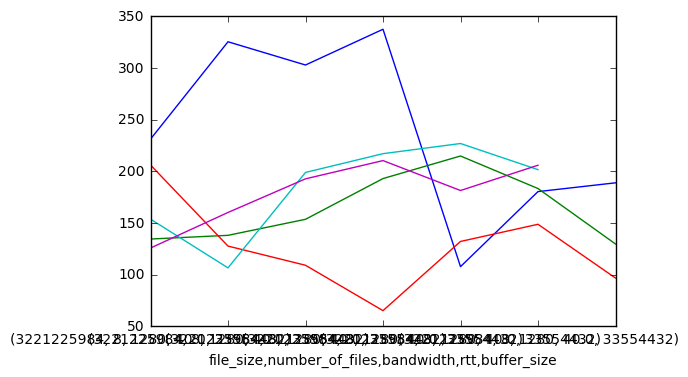

In [33]:
# Figure with lexicographical order : p, cc, pp 
run1_data0 = l_3GB_8[431:867]
# Plot your graph:

run1_data0 = run1_data0[(run1_data0.pp == 1) &(run1_data0.p == 1) & (run1_data0.fast == 0)]
#print(run1_data0)
#run1_data0 = run0_data0.copy(deep=True)
#run1_data0['ticks'] =  run1_data0.cc.astype(str) 
run1_data0.throughput.plot()

# Figure with lexicographical order : p, cc, pp 
run2_data0 = l_3GB_8[0:429]
# Plot your graph:

run2_data0 = run2_data0[(run2_data0.pp == 1) &(run2_data0.p == 1) & (run2_data0.fast == 0)]
#print(run2_data0)
#run1_data0 = run0_data0.copy(deep=True)
#run1_data0['ticks'] =  run1_data0.cc.astype(str) 
run2_data0.throughput.plot()

# Figure with lexicographical order : p, cc, pp 
run3_data0 = l_3GB_8[864:1296]
# Plot your graph:

run3_data0 = run3_data0[(run3_data0.pp == 1) &(run3_data0.p == 1) & (run3_data0.fast == 0)]
#print(run2_data0)
#run1_data0 = run0_data0.copy(deep=True)
#run1_data0['ticks'] =  run1_data0.cc.astype(str) 
#run3_data0.plot(x =run3_data0,y = range(1,7), kind)
run3_data0.throughput.plot()

# Figure with lexicographical order : p, cc, pp 
run4_data0 = l_3GB_8[1296:1728]
# Plot your graph:

run4_data0 = run4_data0[(run4_data0.pp == 1) &(run4_data0.p == 1) & (run4_data0.fast == 0)]
#print(run2_data0)
#run1_data0 = run0_data0.copy(deep=True)
#run1_data0['ticks'] =  run1_data0.cc.astype(str) 
#run3_data0.plot(x =run3_data0,y = range(1,7), kind)
run4_data0.throughput.plot()

# Figure with lexicographical order : p, cc, pp 
run5_data0 = l_3GB_8[1728:2160]
# Plot your graph:

run5_data0 = run5_data0[(run5_data0.pp == 1) &(run5_data0.p == 1) & (run5_data0.fast == 0)]
#print(run2_data0)
#run1_data0 = run0_data0.copy(deep=True)
#run1_data0['ticks'] =  run1_data0.cc.astype(str) 
#run3_data0.plot(x =run3_data0,y = range(1,7), kind)
run5_data0.throughput.plot()

In [34]:
432*5

2160

                                                       p  cc  pp  fast  \
file_size  number_of_files bandwidth rtt  buffer_size                    
3221225984 8               1280      40.0 33554432     1   1   1     0   
                                          33554432     1   2   1     0   
                                          33554432     1   4   1     0   
                                          33554432     1   8   1     0   
                                          33554432     1  16   1     0   
                                          33554432     1  32   1     0   
                                          33554432     1   1   1     0   
                                          33554432     1   2   1     0   

                                                       throughput        time  \
file_size  number_of_files bandwidth rtt  buffer_size                           
3221225984 8               1280      40.0 33554432     134.511556  182.705568   
                

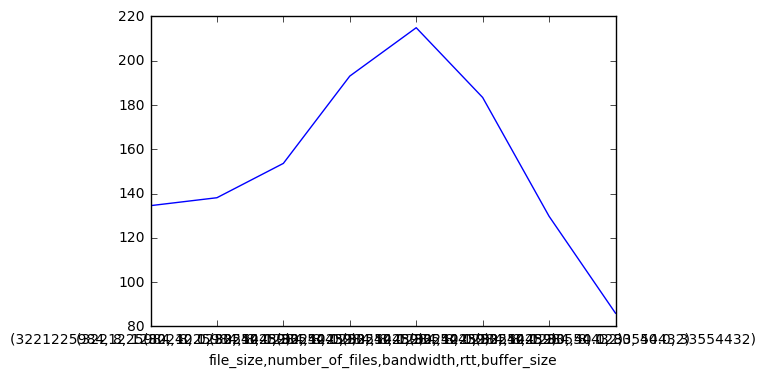

In [35]:
# Figure with lexicographical order : p, cc, pp 
run2_data0 = l_3GB_8[0:431]
# Plot your graph:

run2_data0 = run2_data0[(run2_data0.pp == 1) &(run2_data0.p == 1) & (run2_data0.fast == 0)]
print(run2_data0)
#run1_data0 = run0_data0.copy(deep=True)
#run1_data0['ticks'] =  run1_data0.cc.astype(str) 
run2_data0.throughput.plot()



In [36]:
x_value = np.arange(1,7)
x_value
y_value = np.array(run1_data0.throughput) * 8
y_value.shape
tick_value = np.array(run1_data0.ticks)
plt.figure(figsize=(35,15))
plt.xlabel('Parameter order - P CC PP', fontsize=40)
plt.xticks(x_value[0:429:32], tick_value[0:429:32])
plt.tick_params(axis='both', which='major', labelsize=30)
plt.ylabel('Throughput (Gbps)', fontsize=40)
#plt.title('Throughput Trajectory(1) - Parameter order- CC', fontsize=50)
plt.plot(x_value, y_value,'-ro',)

AttributeError: 'DataFrame' object has no attribute 'ticks'

In [ ]:
# Figure with lexicographical order : p, pp, cc 
run2 = run0.copy(deep=True)
run2 = run2.reset_index()
# rearrange the columns:
#column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
#                'pp', 'cc', 'p', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
#run2 = run2[column_order]
run2 = run2.sort(['p','pp','cc'])
column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
                'p', 'pp', 'cc', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
run2 = run2[column_order]

# plot the graph:

run2['ticks'] = run2.p.astype(str) + '-' + run2.pp.astype(str) + '-' + run2.cc.astype(str)


x_value = np.arange(1,430)
x_value
y_value = np.array(run2.throughput)
y_value.shape
tick_value = np.array(run2.ticks)
plt.figure(figsize=(35,13))
plt.xlabel('Parameter order - P PP CC', fontsize=40)
plt.xticks(x_value[0:429:32], tick_value[0:429:32])
plt.tick_params(axis='both', which='major', labelsize=30)
plt.ylabel('Throughput (Gbps)', fontsize=40)
plt.title('Throughput Trajectory(2) - Parameter order- P, PP, CC', fontsize=50)
plt.plot(x_value, y_value,'-ro',)

/Users/mds/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/mds/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:28: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/mds/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:43: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/mds/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


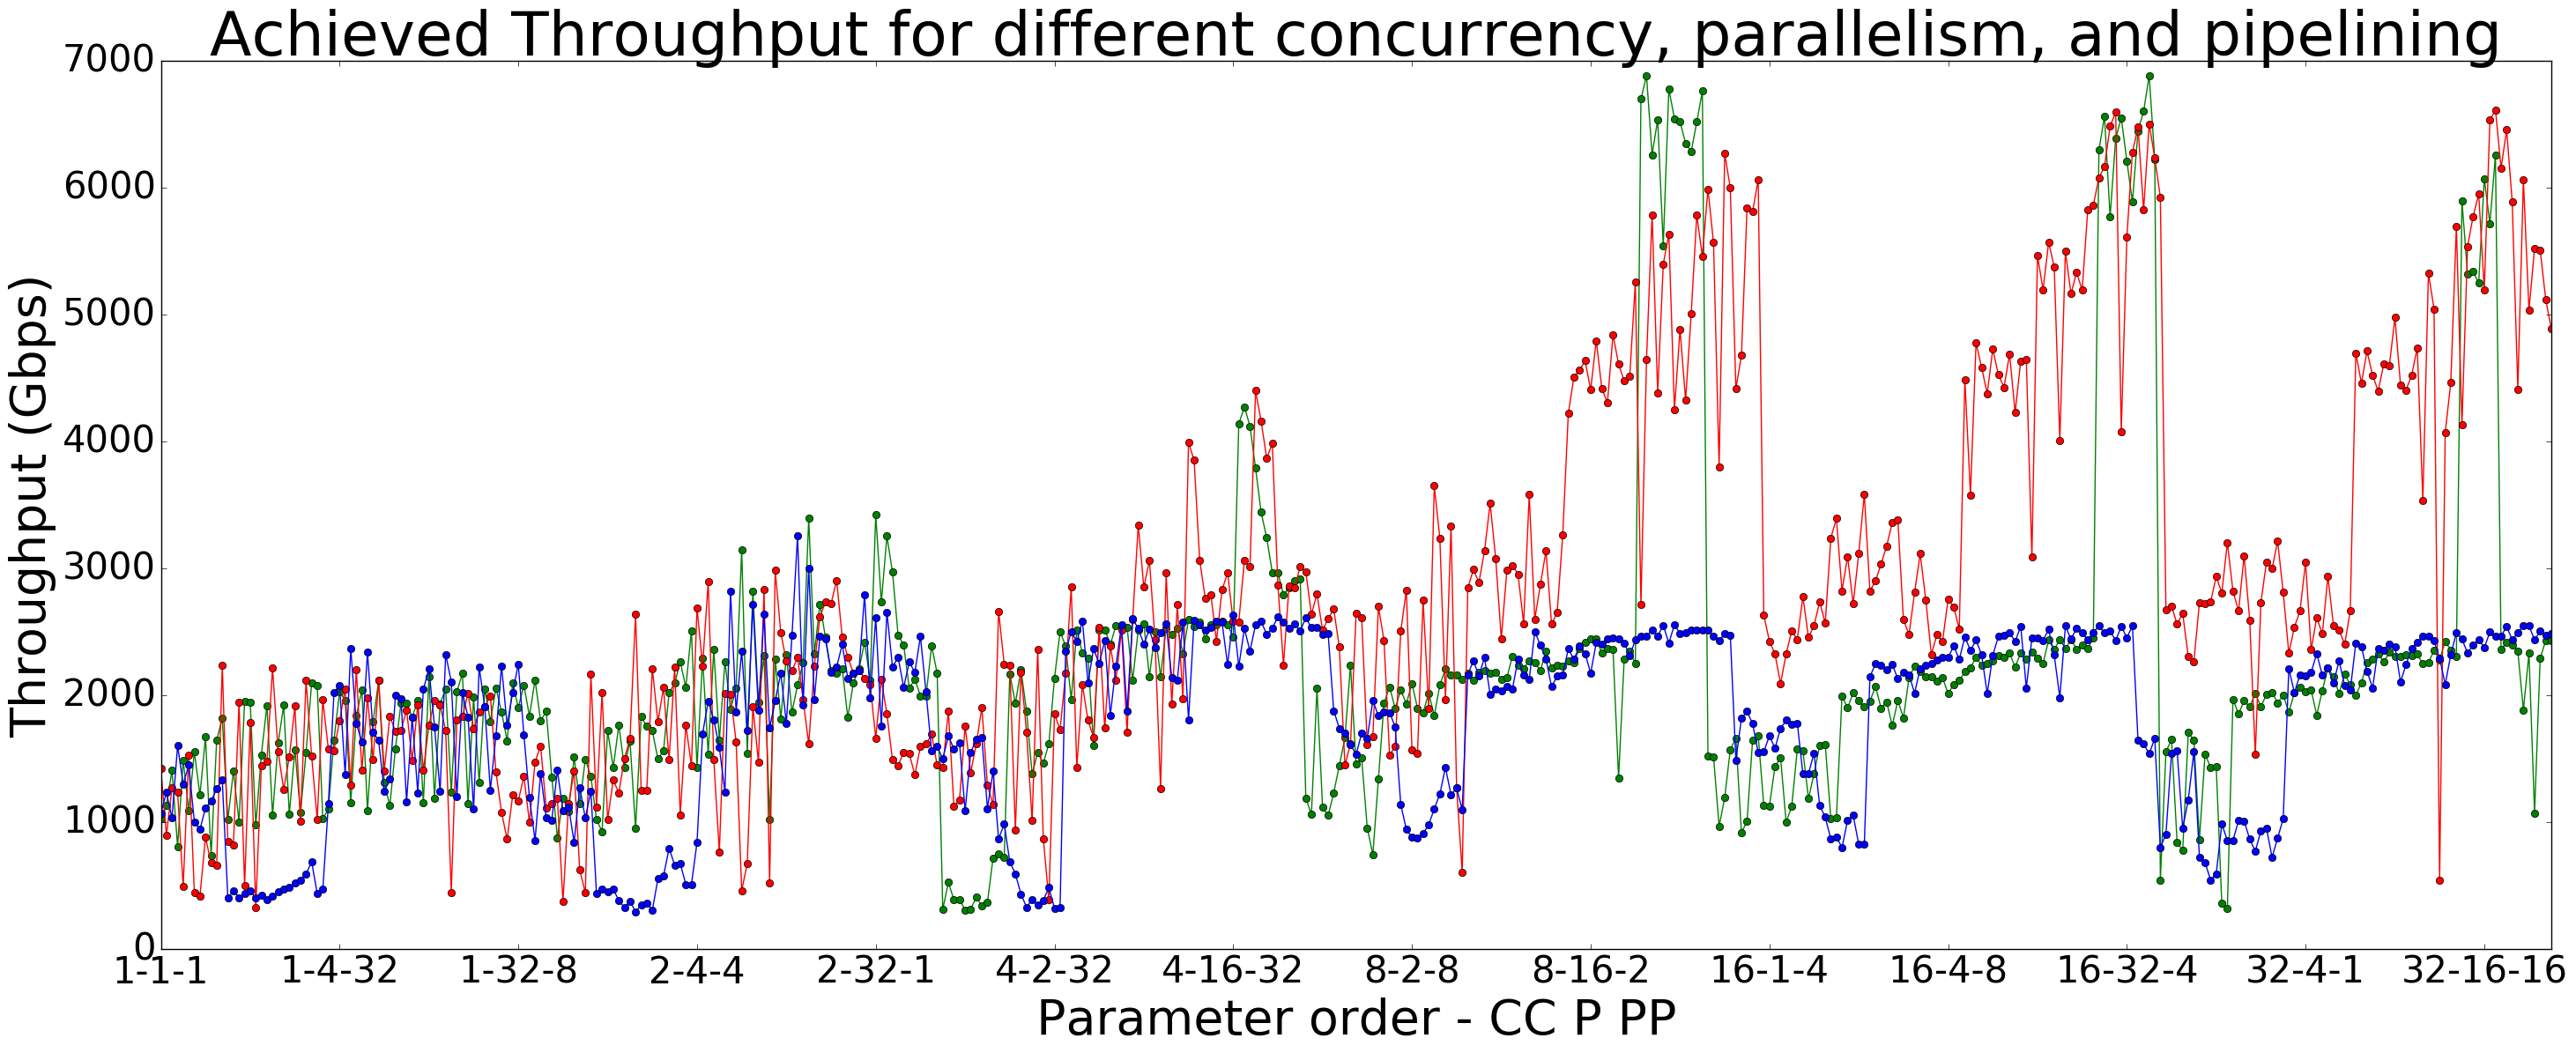

In [37]:
# Figure with lexicographical order : cc, p, pp 

# Run - 1
# .................................................
run3_data0 = l_3GB_8[861:1290]
run3_data0 = run3_data0.reset_index()
# rearrange the columns:
#column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
#                'pp', 'cc', 'p', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
#run2 = run2[column_order]
run3_data0 = run3_data0.sort(['cc','p','pp'])
column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
                'cc', 'p', 'pp', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
run3_data0 = run3_data0[column_order]

# plot the graph:

run3_data0['ticks'] = run3_data0.cc.astype(str) + '-' + run3_data0.p.astype(str) + '-' + run3_data0.pp.astype(str)

# Run - 2
# .................................................
run3_data1 = l_3GB_8[431:860]
run3_data1 = run3_data1.reset_index()
# rearrange the columns:
#column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
#                'pp', 'cc', 'p', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
#run2 = run2[column_order]
run3_data1 = run3_data1.sort(['cc','p','pp'])
column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
                'cc', 'p', 'pp', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
run3_data1 = run3_data1[column_order]
y_value2 = np.array(run3_data1.throughput) * 8


# Run - 3
# .................................................
run3_data2 = l_3GB_8[1291:1720]
run3_data2 = run3_data2.reset_index()
# rearrange the columns:
#column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
#                'pp', 'cc', 'p', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
#run2 = run2[column_order]
run3_data2 = run3_data2.sort(['cc','p','pp'])
column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
                'cc', 'p', 'pp', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
run3_data2 = run3_data2[column_order]
y_value3 = np.array(run3_data2.throughput) * 8

# plot the graph:

run3_data0['ticks'] = run3_data0.cc.astype(str) + '-' + run3_data0.p.astype(str) + '-' + run3_data0.pp.astype(str)

x_value = np.arange(1,430)
x_value
y_value1 = np.array(run3_data0.throughput) * 8
y_value1.shape
tick_value = np.array(run3_data0.ticks)
plt.figure(figsize=(35,13))
plt.gca().set_color_cycle(['red', 'green','blue'])

plt.xlabel('Parameter order - CC P PP', fontsize=40)
plt.xticks(x_value[0:429:32], tick_value[0:429:32])
plt.tick_params(axis='both', which='major', labelsize=30)
plt.ylabel('Throughput (Gbps)', fontsize=40)
plt.title('Achieved Throughput for different concurrency, parallelism, and pipelining', fontsize=50)
plt.plot(x_value, y_value1,'-go')
plt.plot(x_value, y_value2,'-ro')
plt.plot(x_value, y_value3,'-bo')
plt.show()

In [ ]:
# Figure with lexicographical order : cc, p, pp 

# Run - 1
# .................................................
run3_data0 = l_3GB_8[861:1290]
run3_data0 = run3_data0.reset_index()
# rearrange the columns:
#column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
#                'pp', 'cc', 'p', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
#run2 = run2[column_order]
run3_data0 = run3_data0.sort(['cc','p','pp'])
column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
                'cc', 'p', 'pp', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
run3_data0 = run3_data0[column_order]

# plot the graph:

run3_data0['ticks'] = run3_data0.cc.astype(str) + '-' + run3_data0.p.astype(str) + '-' + run3_data0.pp.astype(str)

# Run - 2
# .................................................
run3_data1 = l_3GB_8[431:860]
run3_data1 = run3_data1.reset_index()
# rearrange the columns:
#column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
#                'pp', 'cc', 'p', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
#run2 = run2[column_order]
run3_data1 = run3_data1.sort(['cc','p','pp'])
column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
                'cc', 'p', 'pp', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
run3_data1 = run3_data1[column_order]
y_value2 = np.array(run3_data1.throughput) * 8


# Run - 3
# .................................................
run3_data2 = l_3GB_8[1291:1720]
run3_data2 = run3_data2.reset_index()
# rearrange the columns:
#column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
#                'pp', 'cc', 'p', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
#run2 = run2[column_order]
run3_data2 = run3_data2.sort(['cc','p','pp'])
column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
                'cc', 'p', 'pp', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
run3_data2 = run3_data2[column_order]
y_value3 = np.array(run3_data2.throughput) * 8

# plot the graph:

run3_data0['ticks'] = run3_data0.cc.astype(str) + '-' + run3_data0.p.astype(str) + '-' + run3_data0.pp.astype(str)

x_value = np.arange(1,430)
x_value
y_value1 = np.array(run3_data0.throughput) * 8
y_value1.shape
tick_value = np.array(run3_data0.ticks)
plt.figure(figsize=(35,13))
plt.gca().set_color_cycle(['red', 'green','blue'])

plt.xlabel('Parameter order - CC P PP', fontsize=40)
plt.xticks(x_value[0:429:32], tick_value[0:429:32])
plt.tick_params(axis='both', which='major', labelsize=30)
plt.ylabel('Throughput (Gbps)', fontsize=40)
plt.title('Achieved Throughput for different concurrency, parallelism, and pipelining', fontsize=50)
#plt.plot(x_value, y_value1,'-ro')
plt.plot(x_value, y_value2,'-ro')
#plt.plot(x_value, y_value3,'-bo')
plt.show()

In [ ]:
# Figure with lexicographical order : cc, pp, p 
run4 = run0.copy(deep=True)
run4 = run4.reset_index()
# rearrange the columns:
#column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
#                'pp', 'cc', 'p', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
#run2 = run2[column_order]
run4 = run4.sort(['cc','pp','p'])
column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
                'cc', 'pp', 'p', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
run4 = run4[column_order]

# plot the graph:

run4['ticks'] = run4.cc.astype(str) + '-' + run4.pp.astype(str) + '-' + run4.p.astype(str)


x_value = np.arange(1,430)
x_value
y_value = np.array(run4.throughput)
y_value.shape
tick_value = np.array(run4.ticks)
plt.figure(figsize=(35,13))
plt.xlabel('Parameter order - CC PP P', fontsize=40)
plt.xticks(x_value[0:429:32], tick_value[0:429:32])
plt.tick_params(axis='both', which='major', labelsize=30)
plt.ylabel('Throughput (Gbps)', fontsize=40)
plt.title('Throughput Trajectory(4) - Parameter order- CC, PP, P', fontsize=50)
plt.plot(x_value, y_value,'-ro',)

In [ ]:
# Figure with lexicographical order : pp, cc, p 
run5 = run0.copy(deep=True)
run5 = run5.reset_index()
# rearrange the columns:
#column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
#                'pp', 'cc', 'p', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
#run2 = run2[column_order]
run5 = run5.sort(['pp','cc','p'])
column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
                'pp', 'cc', 'p', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
run5 = run5[column_order]

# plot the graph:

run5['ticks'] = run5.pp.astype(str) + '-' + run5.cc.astype(str) + '-' + run5.p.astype(str)


x_value = np.arange(1,430)
x_value
y_value = np.array(run5.throughput)
y_value.shape
tick_value = np.array(run5.ticks)
plt.figure(figsize=(35,13))
plt.xlabel('Parameter order - PP CC P', fontsize=40)
plt.xticks(x_value[0:429:32], tick_value[0:429:32])
plt.tick_params(axis='both', which='major', labelsize=30)
plt.ylabel('Throughput (Gbps)', fontsize=40)
plt.title('Throughput Trajectory(5) - Parameter order- PP, CC, P', fontsize=50)
plt.plot(x_value, y_value,'-ro',)

In [ ]:
# Figure with lexicographical order : pp, p, cc 
run6 = run0.copy(deep=True)
run6 = run6.reset_index()
# rearrange the columns:
#column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
#                'pp', 'cc', 'p', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
#run2 = run2[column_order]
run6 = run6.sort(['pp','p','cc'])
column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
                'pp', 'p', 'cc', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
run6 = run6[column_order]

# plot the graph:

run6['ticks'] = run6.pp.astype(str) + '-' + run6.p.astype(str) + '-' + run6.cc.astype(str)


x_value = np.arange(1,430)
x_value
y_value = np.array(run6.throughput)
y_value.shape
tick_value = np.array(run6.ticks)
plt.figure(figsize=(35,13))
plt.xlabel('Parameter order - PP P CC', fontsize=40)
plt.xticks(x_value[0:429:32], tick_value[0:429:32])
plt.tick_params(axis='both', which='major', labelsize=30)
plt.ylabel('Throughput (Gbps)', fontsize=40)
plt.title('Throughput Trajectory(6) - Parameter order- PP, P, CC', fontsize=50)
plt.plot(x_value, y_value,'-ro',)

# Curve smoothing for all trajectories

In [ ]:
# running average :
run_mov = pds.rolling_mean(run1.throughput, 30)
run_mov = pds.rolling_mean(run_mov, 10)
#run_mov.plot()
# plot the graph:

run1['ticks'] = run1.p.astype(str) + '-' + run1.cc.astype(str) + '-' + run1.pp.astype(str)


x_value = np.arange(1,430)
x_value
y_value = np.array(run_mov)
y_value.shape
tick_value = np.array(run1.ticks)
plt.figure(figsize=(35,13))
plt.xlabel('Parameter order - P CC PP', fontsize=40)
plt.xticks(x_value[0:429:32], tick_value[0:429:32])
plt.tick_params(axis='both', which='major', labelsize=30)
plt.ylabel('Throughput (Gbps)', fontsize=40)
plt.title('Throughput Trajectory After smoothing(1) - Parameter order- P, CC, PP', fontsize=50)
plt.plot(x_value, y_value,'-ro',)

In [ ]:
# running average : order p, pp, cc
run_mov = pds.rolling_mean(run2.throughput, 30)
run_mov = pds.rolling_mean(run_mov, 10)
#run_mov.plot()
# plot the graph:

run2['ticks'] = run2.p.astype(str) + '-' + run2.pp.astype(str) + '-' + run2.cc.astype(str)


x_value = np.arange(1,430)
x_value
y_value = np.array(run_mov)
y_value.shape
tick_value = np.array(run2.ticks)
plt.figure(figsize=(35,13))
plt.xlabel('Parameter order - P PP CC', fontsize=40)
plt.xticks(x_value[0:429:32], tick_value[0:429:32])
plt.tick_params(axis='both', which='major', labelsize=30)
plt.ylabel('Throughput (Gbps)', fontsize=40)
plt.title('Throughput Trajectory After smoothing(2) - Parameter order- P, PP, CC', fontsize=50)
plt.plot(x_value, y_value,'-ro',)

In [ ]:
def smoothing(cc):
    length = cc.shape
    p = list(range(1,length[0]+1))
    x = np.array(p)
    fitvar = np.polyfit(x,cc,9)
    plt.plot(x,cc,'o')
    plt.plot(x,np.polyval(fitvar,x))

In [ ]:
# Spline : 
def smoothing_spline(cc):
    length = cc.shape
    p = list(range(1,length[0]+1))
    x = np.array(p)
    fitvar = splrep(x,cc,s=0)
    plt.plot(x,cc,'o')
    newx = np.arange(1,length[0], 0.01)
    plt.plot(newx,splev(newx,fitvar,der=0))

In [ ]:
# moving average then poly regression run_mov
smoothing(run_mov.dropna())

In [ ]:
# run1: polynomial regression 
smoothing(run1.throughput)

In [ ]:
# cubic spline fitting
smoothing_spline(run1.throughput)

In [ ]:
cc1 = run1[run1.cc == 1]
cc1_1 = cc1[1:12].throughput.plot()
#smoothing(cc1_1)

In [ ]:
run1.head(5)

# Cubic Spline for fitting:

In [ ]:
# moving average + spline
cc1 = run1[(run1.cc == 1) & (run1.fast == 1)]
cc1_1 = cc1[0:6].throughput

In [ ]:
def smoothing_with_errorbar(cc):
    length = cc.shape
    p = list(range(1,length[0]+1))
    x = np.array(p)
    fitvar = np.polyfit(x,cc,9)
    plt.plot(x,cc,'o')
    plt.errorbar(x,cc,yerr=[[20,30,25,78,17,20],[20,34,12,10,13,14]])
    plt.plot(x,np.polyval(fitvar,x))
#cc1_mov = pds.rolling_mean(cc1_1, 2)
#smoothing_spline(cc1_mov.dropna())
smoothing_with_errorbar(cc1_1)

In [ ]:
# Only spline
cc2 = run1[run1.cc == 2]
cc2_1 = cc2[0:12].throughput
smoothing_spline(cc2_1)

In [ ]:
# Only spline
cc2 = run1[run1.cc == 2]
cc2_1 = cc2[0:12].throughput
cc2_mov = pds.rolling_mean(cc2_1, 2)
smoothing_spline(cc2_mov.dropna())
#smoothing_spline(cc2_1)

In [ ]:
# Only spline
cc4 = run1[run1.cc == 4]
cc4_1 = cc4[0:12].throughput
smoothing_spline(cc4_1)

In [ ]:
# Only moving avearage + spline 
cc4 = run1[run1.cc == 4]
cc4_1 = cc4[0:12].throughput
cc4_mov = pds.rolling_mean(cc4_1, 2)
smoothing_spline(cc4_mov.dropna())

In [ ]:
cc8 = run1[run1.cc == 8]
cc8_1 = cc8[0:12].throughput
smoothing_spline(cc8_1)

In [ ]:
cc8 = run1[run1.cc == 8]
cc8_1 = cc8[0:12].throughput
cc8_mov = pds.rolling_mean(cc8_1, 2)
smoothing_spline(cc8_mov.dropna())

In [ ]:
cc16 = run1[run1.cc == 16]
cc16_1 = cc16[0:12].throughput
smoothing_spline(cc16_1)

In [ ]:
cc16 = run1[run1.cc == 16]
cc16_1 = cc16[0:12].throughput
cc16_mov = pds.rolling_mean(cc16_1, 2)
smoothing_spline(cc16_mov.dropna())

In [ ]:
cc32 = run1[run1.cc == 32]
cc32_1 = cc32[0:12].throughput
smoothing_spline(cc32_1)

In [ ]:
cc32 = run1[run1.cc == 32]
cc32_1 = cc32[0:12].throughput
cc32_mov = pds.rolling_mean(cc32_1, 2)
smoothing_spline(cc32_mov.dropna())

# 

In [ ]:

# find all p for which cc = 32 and pp = 2
p_value = run1[(run1.cc==32) & (run1.pp==2)]
x_value = np.arange(1,13)
y_value = np.array(p_value.throughput)
x_ticks = np.arange(1,33)
plt.plot(x_value, y_value, '--bo')
plt.xticks(x_value, x_ticks)
y_value.shape

In [ ]:
def smoothing_custom(cc):
    length = cc.shape
    p = list(range(1,length[0]+1))
    x = np.array(p)
    fitvar = splrep(x,cc,s=0)
    plt.plot(x,cc,'o')
    tick_value = np.arange(1,33)
    newx = np.arange(1,length[0], 0.01)
    plt.plot(newx,splev(newx,fitvar,der=0))
    #plt.xticks(x[1:12:1],tick_value[1:32:4])
pp_opt = p_value.throughput
#cc32_mov1 = pds.rolling_mean(pp_opt, 2)
#cc32_mov = pds.rolling_mean(cc32_mov1, 2)
smoothing_custom(pp_opt.dropna())

In [ ]:
p_value

In [ ]:
run1.sort(['throughput']).tail()

In [ ]:
def find_max_bitonic(ary):
    def recurse(low, high):
        mid = int(low + (high - low) / 2)
        # Handle base cases first.
        if (high - low == 1):
            return high

        if (ary[mid] < ary[mid+1]):
            return recurse(mid, high) # Go right.
        else:
            return recurse(low, mid)
    return recurse(0, len(ary) - 1)
arr = [2,3,4,5,6,7,8,9,5.5]

    



In [ ]:
ary = (50,500, 45, 20, 10, 4)
plt.plot(ary)
maximum = find_max_bitonic(ary)
maximum

# 3D plot for cc and pp

In [ ]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

#plt.figure(figsize=(35,13))
fig = plt.figure(figsize=(17,11))
ax = fig.gca(projection='3d')
pipe = np.array([1,2,4,8,16,32])
conc = np.array([1,1,1,1,1,1])
ths = np.array(cc1_1[1:12:2])
#theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
#z = np.linspace(-2, 2, 100)
#r = z**2 + 1
#x = r * np.sin(theta)
#y = r * np.cos(theta)
ax.plot(pipe, conc, ths, label='parametric curve')

pipe = np.array([1,2,4,8,16,32])
conc = np.array([2,2,2,2,2,2])
ths = np.array(cc2_1[1:12:2])

ax.plot(pipe, conc, ths, label='parametric curve')

pipe = np.array([1,2,4,8,16,32])
conc = np.array([4,4,4,4,4,4])
ths = np.array(cc4_1[1:12:2])

ax.plot(pipe, conc, ths, label='parametric curve')

pipe = np.array([1,2,4,8,16,32])
conc = np.array([8,8,8,8,8,8])
ths = np.array(cc8_1[1:12:2])

ax.plot(pipe, conc, ths, label='parametric curve')

pipe = np.array([1,2,4,8,16,32])
conc = np.array([16,16,16,16,16,16])
ths = np.array(cc16_1[1:12:2])

ax.plot(pipe, conc, ths, label='parametric curve')

pipe = np.array([1,2,4,8,16,32])
conc = np.array([32,32,32,32,32,32])
ths = np.array(cc32_1[1:12:2])

ax.plot(pipe, conc, ths, label='parametric curve')

ax.plot_wireframe(pipe, conc, ths, rstride=1, cstride=1)
# ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
#ax.legend()
ax.set_xlabel('pp',fontsize=20)
ax.set_ylabel('CC',fontsize=20)
ax.set_zlabel('Throughput',fontsize=20)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

In [ ]:
X

In [ ]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.2*np.sqrt(x)
xerr = 0.1 + yerr

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
#plt.errorbar(x, y, xerr=0.2, yerr=0.4)
#plt.title("Simplest errorbars, 0.2 in x, 0.4 in y")

# Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
ax = axs[0,0]
ax.errorbar(x, y, yerr=yerr, fmt='o')
ax.set_title('Vert. symmetric')

# With 4 subplots, reduce the number of axis ticks to avoid crowding.
ax.locator_params(nbins=4)

ax = axs[0,1]
ax.errorbar(x, y, xerr=xerr, fmt='o')
ax.set_title('Hor. symmetric')

ax = axs[1,0]
ax.errorbar(x, y, yerr=[yerr, 2*yerr], xerr=[xerr, 2*xerr], fmt='--o')
ax.set_title('H, V asymmetric')

ax = axs[1,1]
ax.set_yscale('log')
# Here we have to be careful to keep all y values positive:
ylower = np.maximum(1e-2, y - yerr)
yerr_lower = y - ylower

ax.errorbar(x, y, yerr=[yerr_lower, 2*yerr], xerr=xerr,
            fmt='o', ecolor='g', capthick=2)
ax.set_title('Mixed sym., log y')

fig.suptitle('Variable errorbars')

plt.show()

In [ ]:
yerr=[yerr_lower, 2*yerr]
yerr

#  Manually analyze the large file transfers:

In [ ]:
# copy main data into a temporary variable :
temp_data = data.copy(deep=True)
temp_data.head()

In [ ]:
# get the unique source and destination names : as tuple 
#transfer_requests = data[['file_size','number_of_files','bandwidth','rtt','buffer_size']]
source_name = temp_data[['source']]
droped_duplicate_sources = source_name.drop_duplicates()

unique_sources = [tuple(sources) for sources in droped_duplicate_sources.values]
unique_sources

In [ ]:
# get the unique destination names : as tuple 
#transfer_requests = data[['file_size','number_of_files','bandwidth','rtt','buffer_size']]
destination_name = temp_data[['destination']]
droped_duplicate_destinations = destination_name.drop_duplicates()

unique_destination = [tuple(destinations) for destinations in droped_duplicate_destinations.values]
unique_destination

In [ ]:
# get the unique destination names : as tuple 
#transfer_requests = data[['file_size','number_of_files','bandwidth','rtt','buffer_size']]
source_destination_name = temp_data[['source','destination']]
droped_duplicate_sources_destinations = source_destination_name.drop_duplicates()

unique_sources_destination = [tuple(sources_destinations) for sources_destinations in droped_duplicate_sources_destinations.values]
unique_sources_destination

In [ ]:
# filter data based on source and destination tuple:
# set source and destination as index:
r = temp_data.set_index(['source','destination'])
r.head()

In [ ]:
# Get the data with source = Stampede and destination = Gordon or Gordon/Oasis
part_1 = r.loc[('Stampede', 'Gordon/Oasis')]
#part_2 = r.loc[('Stampede', 'Gordon/oasis')]
#part_3 = r.loc[('Stampede', 'Gordon')]
# concatanate all three :
stampede_gordon = pds.concat([part_1], axis=0)
stampede_gordon.head()

In [ ]:
# reset the index:
stampede_gordon = stampede_gordon.reset_index(['source','destination'])
# reordering the columns inside the dataframe:
column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
            'p', 'cc', 'pp', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
stampede_gordon = stampede_gordon[column_order]
stampede_gordon.head()

# small file analysis: 

In [ ]:
# get the logs with filesize in between 50MB and 250MB. 
filesize_filter_small = ((stampede_gordon.file_size.astype(int) <= (40*1000*1000))  )
small_st_gordon = stampede_gordon[filesize_filter_small]
small_st_gordon.head()

In [ ]:
# get the unique transfers : 
# get the unique transfers : as tuple 
transfer_requests = small_st_gordon[['file_size','number_of_files','bandwidth','rtt','buffer_size']]
droped_duplicate_trans_req = transfer_requests.drop_duplicates()

unique_transfers_small = [tuple(transfers) for transfers in droped_duplicate_trans_req.values]
unique_transfers_small

In [ ]:
# set request param as index:
r_small = small_st_gordon.set_index(['file_size','number_of_files','bandwidth','rtt','buffer_size'])
r_small.head()

In [ ]:
# same operations for 50MB with 999 files dataset:
l_50MB_999 = r_small.loc[('5242941', '999', '1280', '39.0', '49920000')]
l_50MB_999 = l_50MB_999[l_50MB_999.p*l_50MB_999.cc <= 14]
p_50MB_999 = l_50MB_999.sort_values('throughput')
p_50MB_999.tail(25)

In [ ]:
p_50MB_999[(p_50MB_999.p==4) & (p_50MB_999.cc==2) & (p_50MB_999.pp == 8)]

In [ ]:
# same operations for 25MB with 200 files dataset:
l_25MB_200 = r_small.loc[('26214461', '200', '1280', '40.0', '33554432')]
l_25MB_200 = l_25MB_200[l_25MB_200.p*l_25MB_200.cc <= 16]
p_25MB_200 = l_25MB_200.sort_values('throughput')
p_25MB_200.tail(25)

In [ ]:
p_25MB_200[(p_25MB_200.p==4) & (p_25MB_200.cc==2) & (p_25MB_200.pp == 8)]

In [ ]:
p_25MB_200[(p_25MB_200.p==1) & (p_25MB_200.cc==8) & (p_25MB_200.pp == 32)]

In [ ]:
# same operations for 100MB with 299 files dataset:
l_512KB = r_small.loc[('5242929', '1000', '1280', '40.0', '33554432')]
l_512KB = l_512KB[l_512KB.p*l_512KB.cc <= 8]
p_512KB = l_512KB.sort_values('throughput')
p_512KB.tail(25)

In [ ]:
p_512KB[(p_512KB.p==2) & (p_512KB.cc==2) & (p_512KB.pp == 16)]

# Medium file analysis:

In [ ]:
# get the logs with filesize in between 50MB and 250MB. 
filesize_filter_medium = ((stampede_gordon.file_size.astype(int) <= (200*1000*1000)) & ( stampede_gordon.file_size.astype(int) >= (45*1000*1000) ) )
medium_st_gordon = stampede_gordon[filesize_filter_medium]
medium_st_gordon.head()

In [ ]:
# get the unique transfers : 
# get the unique transfers : as tuple 
transfer_requests = medium_st_gordon[['file_size','number_of_files','bandwidth','rtt','buffer_size']]
droped_duplicate_trans_req = transfer_requests.drop_duplicates()

unique_transfers_medium = [tuple(transfers) for transfers in droped_duplicate_trans_req.values]
unique_transfers_medium

In [ ]:
# set request param as index:
r_medium = medium_st_gordon.set_index(['file_size','number_of_files','bandwidth','rtt','buffer_size'])
r_medium.head()

In [ ]:
# same operations for 100MB with 69 files dataset:
l_100MB_69 = r_medium.loc[('104857659', '69', '1280', '39.0', '49920000')]
l_100MB_69 = l_100MB_69[l_100MB_69.p*l_100MB_69.cc <= 16]
p_100MB_69 = l_100MB_69.sort_values('throughput')
p_100MB_69.tail(25)

In [ ]:
# same operations for 130MB with 329 files dataset:
l_130MB_329 = r_medium.loc[('130884019', '329', '1280', '40.0', '33554432')]
l_130MB_329 = l_130MB_329[l_130MB_329.p*l_130MB_329.cc <= 16]
p_130MB_329 = l_130MB_329.sort_values('throughput')
p_130MB_329.tail(25)

In [ ]:
p_130MB_329[(p_130MB_329.p==4) & (p_130MB_329.cc==2) & (p_130MB_329.pp == 8)]

In [ ]:
# same operations for 100MB with 299 files dataset:
l_100MB_299 = r_medium.loc[('104857668', '299', '1280', '39.0', '49920000')]
l_100MB_299 = l_100MB_299[l_100MB_299.p*l_100MB_299.cc <= 16]
p_100MB_299 = l_100MB_299.sort_values('throughput')
p_100MB_299.tail(25)

In [ ]:
p_100MB_299[(p_100MB_299.p==4) & (p_100MB_299.cc==2) & (p_100MB_299.pp == 8)]

In [ ]:
# same operations for 100MB dataset:
l_100MB = r_medium.loc[('104857664', '64', '1280', '40.0', '33554432')]
l_100MB = l_100MB[l_100MB.p*l_100MB.cc <= 16]
p_100MB = l_100MB.sort_values('throughput')
p_100MB.tail(25)

In [ ]:
p_100MB[(p_100MB.p==4) & (p_100MB.cc==2) & (p_100MB.pp == 8)]

# Large file analysis:

In [ ]:
# get the logs with filesize greater than 250MB. 
filesize_filter = (stampede_gordon.file_size.astype(int) > (200*1000*1000) )
large_st_gordon = stampede_gordon[filesize_filter]
large_st_gordon.head()

In [ ]:
# get the unique transfers : 
# get the unique transfers : as tuple 
transfer_requests = large_st_gordon[['file_size','number_of_files','bandwidth','rtt','buffer_size']]
droped_duplicate_trans_req = transfer_requests.drop_duplicates()

unique_transfers = [tuple(transfers) for transfers in droped_duplicate_trans_req.values]
unique_transfers

In [ ]:
# set request param as index:
r = large_st_gordon.set_index(['file_size','number_of_files','bandwidth','rtt','buffer_size'])
r.head()

In [ ]:
# get the values 20 streams:
l = r.loc[('1073742080', '16', '1280', '40.0', '33554432')]
l = l[l.p*l.cc <= 20]
l.head()

In [ ]:
p1 = l.sort_values('throughput')
p1.tail(25)

In [ ]:
# find throughput for globus online:
p1[(p1.p==8) & (p1.cc==2) & (p1.pp == 4)]

In [ ]:
# same operations for 3GB dataset:
l_3GB = r.loc[('3221225984', '8', '1280', '40.0', '33554432')]
l_3GB = l_3GB[l_3GB.p*l_3GB.cc <= 20]
p_3GB = l_3GB.sort_values('throughput')
p_3GB.tail(25)

In [ ]:
# find throughput for globus online:
p_3GB[(p_3GB.p==8) & (p_3GB.cc==2) & (p_3GB.pp == 4)]

In [ ]:
# same operations for 3GB dataset:
l_200MB = r.loc[('209715259', '69', '1280', '39.0', '49920000')]
l_200MB = l_200MB[l_200MB.p*l_200MB.cc <= 20]
p_200MB = l_200MB.sort_values('throughput')
p_200MB.tail(25)

In [ ]:
# find throughput for globus online:
p_200MB[(p_200MB.p==8) & (p_200MB.cc==2) & (p_200MB.pp == 4)]

In [ ]:

# same operations for 2GB dataset:
l_2GB = r.loc[('2873838531', '34', '1280', '40.0', '33554432')]
l_2GB = l_2GB[l_2GB.p*l_2GB.cc <= 20]
p_2GB = l_2GB.sort_values('throughput')
p_2GB.tail(25)

In [ ]:
# find throughput for globus online:
p_2GB[(p_2GB.p==8) & (p_2GB.cc==2) & (p_2GB.pp == 4)]

# clustering data based on file requests:

In [ ]:
# importing libraries:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [ ]:
# some setting for this notebook to actually show the graphs inline, you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [ ]:
# get the data:
unique_transfers[0:5]
# preprocessing : 
# normalization: all columns between 1 to 100: (x - x_min) / (x_max - x_min)

file_size_min = data.file_size.min() 
file_size_max = data.file_size.max()
number_of_files_min = data.number_of_files.min()
number_of_files_max = data.number_of_files.max()
bandwidth_max = data.bandwidth.max()
bandwidth_min = data.bandwidth.min()
rtt_min = data.rtt.min()
rtt_max = data.rtt.max()
buffer_size_min = data.buffer_size.min()
buffer_size_max = data.buffer_size.max()

unique_transfers[0:5]

droped_duplicate_trans_req.head()
#droped_duplicate_trans_req.file_size = (droped_duplicate_trans_req.file_size - file_size_min) / (file_size_max -file_size_min)
#droped_duplicate_trans_req.head()
ndarry_data_req = droped_duplicate_trans_req.as_matrix()


In [ ]:
# generate the linkage matrix
# we are using Ward variance minimization algorithm.
# link: https://en.wikipedia.org/wiki/Ward%27s_method
Z = linkage(ndarry_data_req, 'ward')  
Z.shape

In [ ]:
# computing cophenetic correlation coefficient
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(ndarry_data_req))
c

In [ ]:

# calculate full dendrogram
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
)
plt.show()

In [ ]:
# truncating the dendrogram: 
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()